# Нейронные сети

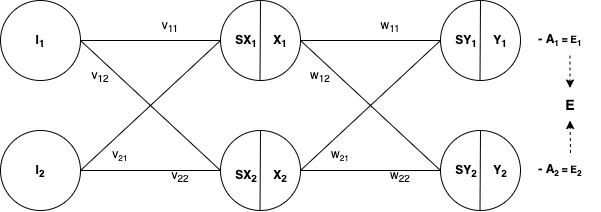

### Веса выходного слоя

Влияние веса w на общую ошибку:

$
\frac{\partial E}{\partial w_{ji}} = \frac{\partial E}{\partial Y_{i}} \cdot \frac{\partial Y_{i}}{\partial SY_{i}} \cdot \frac{\partial SY_{i}}{\partial w_{ji}}
$

Компоненты уравнения (для сигмоиды):

$
\frac{\partial E}{\partial Y_{i}} = Y_{i} - a_{i} \\ \frac{\partial Y_{i}}{\partial SY_{i}} = Y_{i} \cdot (1 - Y_{i}) \\ \frac{\partial SY_{i}}{\partial w_{ji}} = X_{j}
$

Следовательно:

$
\frac{\partial E}{\partial w_{ji}} = (Y_{i} - a_{i}) \cdot Y_{i} \cdot (1 - Y_{i}) \cdot X_{j}
$

Определим ошибку выходного нейрона:

$
\tau_{out_i} = \frac{\partial E}{\partial Y_{i}} \cdot \frac{\partial Y_{i}}{\partial SY_{i}} \\
\tau_{out_i} = (Y_{i} - a_{i}) \cdot Y_{i} \cdot (1 - Y_{i})
$

Следовательно:

$
\frac{\partial E}{\partial w_{ji}} = \tau_{out_i} \cdot X_{j}
$

### Веса внутреннего слоя

Влияние веса v на ошибку нейрона X:

$
\frac{\partial E}{\partial v_{rs}} = \frac{\partial E}{\partial X_{j}} \cdot \frac{\partial X_{j}}{\partial SX_{j}} \cdot \frac{\partial SX_{j}}{\partial v_{rs}}
$

Компоненты уравнения:

$
\frac{\partial E}{\partial X_{j}} = \sum_{i=1}^{n} \frac{\partial E}{\partial Y_{i}} \cdot \frac{\partial Y_{i}}{\partial SY_{i}} \cdot \frac{\partial SY_{i}}{\partial X_{j}}
$

$
\frac{\partial E}{\partial X_{j}} = \sum_{i=1}^{n} (Y_{i} - a_{i}) \cdot Y_{i} \cdot (1 - Y_{i}) \cdot w_{ji} 
$

Подставив определение ошибки, получим:

$
\frac{\partial E}{\partial X_{j}} = \sum_{i=1}^{n} \tau_{out_i} \cdot w_{ji}
$

Остальные компоненты высчитываются аналогично:

$
\frac{\partial E}{\partial v_{rs}} = (\sum_{i=1}^{n} \tau_{out_i} \cdot w_{ji}) \cdot \frac{\partial X_{j}}{\partial SX_{j}} \cdot \frac{\partial SX_{j}}{\partial v_{rs}}
$

$
\frac{\partial E}{\partial v_{rs}} = (\sum_{i=1}^{n} \tau_{out_i} \cdot w_{ji}) \cdot X_{j} \cdot (1 - X_{j}) \cdot I_{s}
$

Определим ошибку внутреннего нейрона:

$
\tau_{in_i} = (\sum_{i=1}^{n} \tau_{out_i} \cdot w_{ji}) \cdot X_{j} \cdot (1 - X_{j})
$

Следовательно:

$
\frac{\partial E}{\partial v_{rs}} = \tau_{in_i} \cdot I_{s}
$

In [ ]:
import numpy as np
import sys

In [ ]:
np.random.seed(1)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])

y = np.array([[0, 1, 1, 0]])

In [ ]:
epochs = 80_000

In [ ]:
w1 = 2 * np.random.random((3,2)) - 1
w2 = 2 * np.random.random((1,3)) - 1
learning_rate = 1

In [ ]:
for epoch in range(epochs):
    hide = sigmoid(w1 @ X)
    out = sigmoid(w2 @ hide)
    
    err = (y - out)
    
    e_out = err*out*(1-out)
    e_hide = (w2.T @ e_out)*hide*(1-hide)
    
    w2 += learning_rate * (e_out @ hide.T)
    w1 += learning_rate * (e_hide @ X.T)
    
    sys.stdout.write("\rProgress: {}%, Training loss: {}".format(str(epoch / epochs * 100)[:2], str(np.mean(np.abs(err)))[:5]))

In [ ]:
def predict(arg):
    hide = sigmoid(w1 @ arg)
    out = sigmoid(w2 @ hide)
    
    return out > 0.5

In [ ]:
def predict_proba(arg):
    hide = sigmoid(w1 @ arg)
    out = sigmoid(w2 @ hide)
    
    return out

In [ ]:
predict(X)

In [ ]:
predict_proba(X)

In [ ]:
for x,y in zip(X.T,y.T):
    print("For input: {} expected {}, the prediction is: {} with probability {}".format(
        str(x),
        str(y == 1),
        str(predict(x)),
        str((np.around(predict_proba(x),4)))))